In [1]:
# 1. graph(): this function is used to create a graph object which can be used to define the state, 
# edges and nodes of the graph. It takes a name as an argument which is used to identify the graph.

# 2. state: this function is used to define the state of the graph. It takes a name as an argument which is used to identify the state.
# It also takes a description as an argument which is used to describe the state.

# 3. edges: this function is used to define the edges of the graph. It takes a name as an argument which is used to identify the edge. 
# It also takes a description as an argument which is used to describe the edge. It also takes a source and target as arguments which are used to define the source and target of the edge.

# 4. nodes: this function is used to define the nodes of the graph. It takes a name as an argument which is used to identify the node. 
# It also takes a description as an argument which is used to describe the node. It also takes a state as an argument which is used to define the state of the node.

# 5. invoke: this function is used to invoke the tool. It takes a dictionary as an argument which contains the input parameters for the tool.

# 6. stategraph(): this function is used to create a state graph object which can be used to define the state, edges and nodes of the state graph. 
# It takes a name as an argument which is used to identify the state graph.

Building Simple Workflow
: Method 1

In [2]:
import dotenv
dotenv.load_dotenv()

True

In [3]:
def function1(input1):
    return input1+ " from first function"

In [4]:
def function2(input1):
    return input1+ " from second function"

In [5]:
def function3(input1):
    return input1+ " from third function"

In [6]:
function1("Tushar")

'Tushar from first function'

In [7]:
function2("Aaditya")

'Aaditya from second function'

In [8]:
function3("Krish")

'Krish from third function'

In [9]:
from langgraph.graph import StateGraph, MessagesState, START, END   

In [10]:
# Create a state graph with MessagesState as the initial state
workflow1 = StateGraph(MessagesState)

In [11]:
# Add nodes to the graph
workflow1.add_node("fun1",function1)

In [12]:
# Add another node to the graph
workflow1.add_node("fun2",function2)

In [13]:
# Add an edge between the nodes
workflow1.add_edge("fun1","fun2")

In [14]:
# Set the entry point of the graph
workflow1.set_entry_point("fun1")


In [15]:
# Set the finish point of the graph
workflow1.set_finish_point("fun2")

In [16]:
# Compile the graph to create an agent
agent=workflow1.compile()

In [17]:
# Get the graph visualization
agent.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

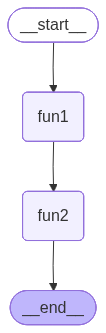

In [18]:
# Display the graph visualization
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

Method 2

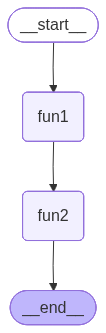


Final output: Tushar from first function from second function

--- Streaming output ---
Output from fun1:
{'output': 'Tushar from first function'}

Output from fun2:
{'output': 'Tushar from first function from second function'}



In [46]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

# 1. Define your state schema
class State(TypedDict):
    input1: str
    output: str

# 2. Fix your functions to work with state
def function1(state):
    return {"output": state["input1"] + " from first function"}

def function2(state):
    return {"output": state["output"] + " from second function"}

def function3(state):
    return {"output": state["output"] + " from third function"}

# 3. Build the workflow with the State
workflow1 = StateGraph(State)

# 4. Add nodes (use string names that match your functions)
workflow1.add_node("fun1", function1)
workflow1.add_node("fun2", function2)

# 5. Add edges
workflow1.add_edge("fun1", "fun2")

# 6. Set entry and finish points
workflow1.set_entry_point("fun1")
workflow1.set_finish_point("fun2")

# 7. Compile
agent = workflow1.compile()

# 8. Display the graph visualization
display(Image(agent.get_graph().draw_mermaid_png()))

# 9. Run with proper input
result = agent.invoke({"input1": "Tushar"})
print("\nFinal output:", result["output"])

# 10. Or stream the results
print("\n--- Streaming output ---")
for output in agent.stream({"input1": "Tushar"}):
    for key, value in output.items():
        print(f"Output from {key}:")
        print(value)
        print()